In [1]:
# Import necessary libraries - certain libraries are imported within the code also

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
#Load dataset
from google.colab import drive
drive.mount('/content/drive/')
project_path='/content/drive/My Drive/Colab Notebooks/'

Mounted at /content/drive/


In [3]:
dataset_file=project_path+'images.npy' # path for images.ipynb

In [4]:
X=np.load(dataset_file) # load the image file

In [5]:
#Print shape of data   
X.shape      # Data is in the correct format for sequential model , hence no reshaping is needed 

(4750, 128, 128, 3)

In [6]:
X[9, :, :, :].shape # The dataset contains 4750 images with each image 128*128 pixels and has 3 color channels

(128, 128, 3)

In [7]:
y=pd.read_csv(project_path+'Labels.csv') # Load labels

In [8]:
y.shape # there are 4750 rows 

(4750, 1)

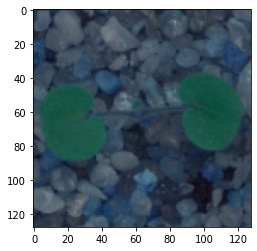

In [9]:
#Visualise few images in dataset

plt.imshow(X[0])

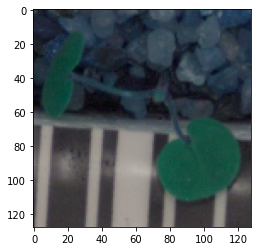

In [10]:
plt.imshow(X[10])

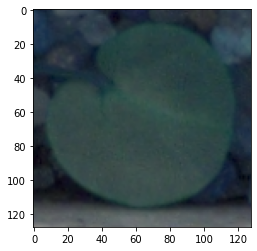

In [11]:
plt.imshow(X[300])

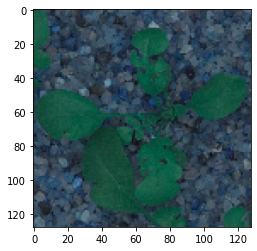

In [12]:
plt.imshow(X[1000])

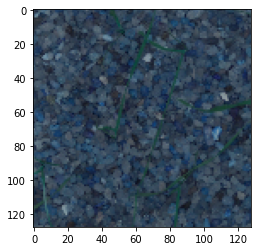

In [13]:
plt.imshow(X[4749])

In [14]:
# There are different images that has RGB color channels and looks like all are of same size 

In [15]:
y.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [16]:
y.value_counts() # there are 12 labels spread across the 4750 images

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

In [17]:
y

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [18]:
X.shape


(4750, 128, 128, 3)

In [19]:
# Normalize the data
X = X.astype('float32') / 255.0

In [20]:
# Gaussian blurring - to reduce noise and smoothen 

for idx, img in enumerate(X):
  X[idx] = cv2.GaussianBlur(img, (5, 5), 0)

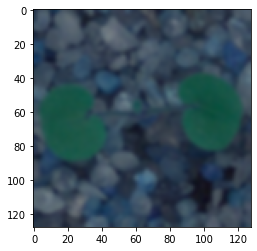

In [21]:
plt.imshow(X[0], cmap='gray')

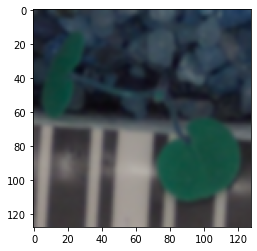

In [22]:
plt.imshow(X[10], cmap='gray')

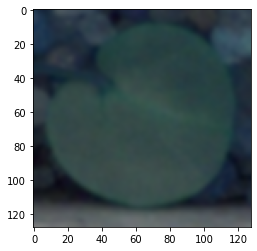

In [23]:
plt.imshow(X[300], cmap='gray')

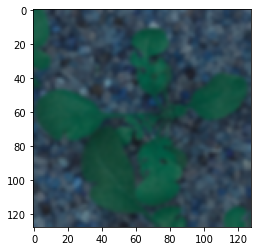

In [24]:
plt.imshow(X[1000], cmap='gray')

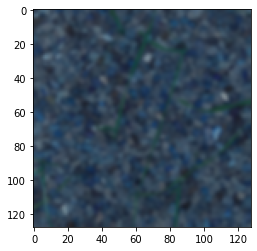

In [25]:
plt.imshow(X[4749], cmap='gray')

In [26]:
## we can see that after Gaussian filter all the images are smoothened

In [27]:
  # Convert labels to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(y)

In [28]:
y[0] # Print y[0] - we can see 1 in the place of 'True' and rest are '0'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [29]:
## Split data into test , train and validation sets - test_size 0.3 for train_test and test_size 0.5 for test_val


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.50, random_state=0)

In [30]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))  # dtype for the splitted sets

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [31]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)  # shape for the sets

(3325, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)


In [32]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(3325, 12)
(712, 12)
(713, 12)


In [33]:
##No reshaping is needed as these are in the correct format for sequential modelling

In [34]:
## Building CNN

# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [35]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [36]:
# set loss function
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [37]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

Epoch 1/40
104/104 [==============================] - 37s 36ms/step - loss: 5.4588 - accuracy: 0.1283 - val_loss: 2.5428 - val_accuracy: 0.0561

Epoch 00001: val_loss improved from inf to 2.54283, saving model to cifar_cnn_checkpoint_01_loss2.5428.h5
Epoch 2/40
104/104 [==============================] - 3s 27ms/step - loss: 1.9935 - accuracy: 0.3162 - val_loss: 2.5351 - val_accuracy: 0.1360

Epoch 00002: val_loss improved from 2.54283 to 2.53511, saving model to cifar_cnn_checkpoint_02_loss2.5351.h5
Epoch 3/40
104/104 [==============================] - 3s 27ms/step - loss: 1.6661 - accuracy: 0.4056 - val_loss: 2.7947 - val_accuracy: 0.1262

Epoch 00003: val_loss did not improve from 2.53511
Epoch 4/40
104/104 [==============================] - 3s 27ms/step - loss: 1.5112 - accuracy: 0.4677 - val_loss: 2.6968 - val_accuracy: 0.1445

Epoch 00004: val_loss did not improve from 2.53511
Epoch 5/40
104/104 [==============================] - 3s 27ms/step - loss: 1.4310 - accuracy: 0.5129 - va

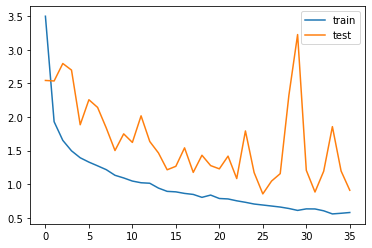

In [38]:
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=40,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [39]:
# Score trained model - Model Evaluation - Test loss and accuracy
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 13ms/step - loss: 0.8210 - accuracy: 0.7135
Test loss: 0.8210304975509644
Test accuracy: 0.7134831547737122


In [40]:
y_pred=model.predict(X_test) # prediction


In [41]:
print(y_pred.shape)

(712, 12)


In [42]:
print(y_test.shape)

(712, 12)


In [43]:
y_test = np.argmax(y_test, axis=1)

In [44]:
y_pred=np.argmax(y_pred,axis=1)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

=== Confusion Matrix ===
[[16  0  0  0  9  0 11  0  1  0  0  0]
 [ 0 39  9  0  0  0  0  0  0  0  0  2]
 [ 0  1 45  0  1  2  0  0  2  0  0  0]
 [ 0  0  0 39  0  0  0  0 27 14 13  2]
 [ 0  0  2  0 30  0  1  0  1  0  1  0]
 [ 0  0  5  0  1 74  0  0  0  0  0  5]
 [20  0  0  0  1  1 66  0  8  0  0  0]
 [ 0  1  1  0  0  3  0 14  1  0  1  5]
 [ 0  0  0  0  0  1  0  0 74  0  0  2]
 [ 0  0  0  0  0  0  0  0 26 12  2  0]
 [ 0  0  2  0  0 11  0  0  4  0 43  0]
 [ 0  0  2  0  1  1  0  0  0  0  0 56]]


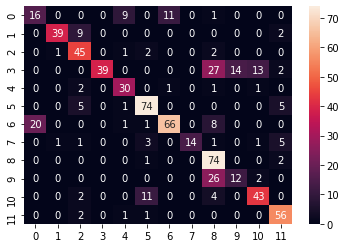

In [47]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [48]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred)) # we can see accuracy is not bad and f1-score is also good 

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.44      0.43      0.44        37
           1       0.95      0.78      0.86        50
           2       0.68      0.88      0.77        51
           3       1.00      0.41      0.58        95
           4       0.70      0.86      0.77        35
           5       0.80      0.87      0.83        85
           6       0.85      0.69      0.76        96
           7       1.00      0.54      0.70        26
           8       0.51      0.96      0.67        77
           9       0.46      0.30      0.36        40
          10       0.72      0.72      0.72        60
          11       0.78      0.93      0.85        60

    accuracy                           0.71       712
   macro avg       0.74      0.70      0.69       712
weighted avg       0.76      0.71      0.71       712



In [49]:
single_test_1 = model.predict(np.expand_dims(X_test[2], axis=0))   # prediction for X_test[2]

In [50]:
print(single_test_1)

[[6.7001008e-03 1.1905333e-02 1.3905960e-03 9.5398603e-03 1.6304597e-04
  1.9498360e-01 9.5259643e-04 6.0910851e-01 1.8867437e-04 7.4764737e-04
  3.1945918e-02 1.3237409e-01]]


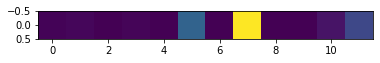

In [51]:
plt.imshow(single_test_1)

[[4.17239527e-04 5.94119960e-03 1.37324985e-02 1.13226296e-02
  3.69805872e-04 1.82526097e-01 8.10731261e-04 1.75705422e-02
  4.81484830e-03 2.16800924e-02 7.29608119e-01 1.12062711e-02]]


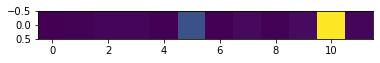

In [52]:
single_test_2 = model.predict(np.expand_dims(X_test[3], axis=0))
print(single_test_2)
plt.imshow(single_test_2)   # prediction for X_test[3]

[[3.8071736e-04 1.3326821e-03 3.1093598e-04 1.7825233e-02 2.9009007e-04
  4.8487308e-03 8.2333516e-03 7.7589642e-04 6.4675093e-01 2.3024467e-01
  9.2831030e-03 7.9723626e-02]]


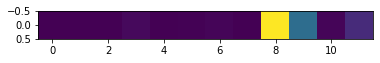

In [53]:
single_test_3 = model.predict(np.expand_dims(X_test[33], axis=0))
print(single_test_3)
plt.imshow(single_test_3)  ## prediction for X_test[33]

[[3.8998588e-03 2.5726037e-04 1.6238151e-02 3.3210055e-04 1.5258578e-02
  9.3687570e-01 6.1937338e-03 1.2920637e-04 3.1849849e-03 5.4894405e-04
  8.8742301e-03 8.2073640e-03]]


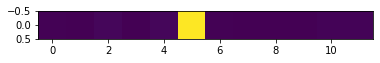

In [54]:
single_test_4 = model.predict(np.expand_dims(X_test[36], axis=0))
print(single_test_4)
plt.imshow(single_test_4) ## prediction for X_test[36]

[[2.0332240e-04 2.1618860e-02 1.1943274e-03 6.8777013e-03 4.4901204e-05
  1.5623838e-02 6.4979767e-04 1.2763569e-02 4.1230559e-02 1.8827919e-02
  1.0871913e-02 8.7009323e-01]]


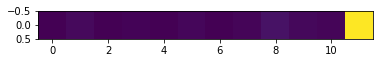

In [55]:
single_test_4 = model.predict(np.expand_dims(X_test[59], axis=0))
print(single_test_4)
plt.imshow(single_test_4) ## prediction for X_test[59]